# Recipes

Double check every recipe listed in the dp0-2.lsst.io documentation for ADQL recipes.

In [28]:
from lsst.rsp import get_tap_service, retrieve_query
import numpy
import matplotlib.pyplot as plt

In [ ]:
service = get_tap_service()

## Cone Search

In [2]:
query = "SELECT TOP 100 * FROM dp02_dc2_catalogs.Object"
results = service.search(query)
results.to_table()

<Table length=100>
 coord_dec   coord_ra  deblend_nChild ... z_psfFluxErr    z_ra   
    deg        deg                    ...     nJy         deg    
  float64    float64       int32      ...   float64     float64  
----------- ---------- -------------- ... ------------ ----------
-44.5129261 49.9828082              0 ...   93.4543846 49.9828081
  -44.51063 49.7664208              0 ...   96.8546919 49.7664479
-44.5091781  49.765766              0 ...   97.2166618 49.7657681
-44.5139071 50.0702578              0 ...   92.0929853 50.0702569
-44.5123156 49.8943233              0 ...   87.2205548 49.8943228
-44.5126099 49.8953354              0 ...   86.6904408 49.8953348
-44.5115258 49.7810784              0 ...   94.4548481 49.7810781
-44.5119118 49.7816127              0 ...   94.4763712 49.7816367
  -44.51251   50.03217              0 ...   89.8343625 50.0321703
        ...        ...            ... ...          ...        ...
-44.5123155 49.9783954              0 ...   93.3294968 49

## Convert fluxes to magnitudes

In [6]:
query = "SELECT coord_dec, coord_ra, "\
        "scisql_nanojanskyToAbMag(g_calibFlux) AS g_calibMag, "\
        "scisql_nanojanskyToAbMagSigma(g_calibFlux, g_calibFluxErr) as g_calibMagErr "\
        "FROM dp02_dc2_catalogs.Object "\
        "WHERE CONTAINS(POINT('ICRS', coord_ra, coord_dec), "\
        "CIRCLE('ICRS', 62, -37, 0.05)) = 1"

results = service.search(query)
results.to_table()

coord_dec,coord_ra,g_calibMag,g_calibMagErr
deg,deg,,
float64,float64,float64,float64
-36.9656694,62.0369809,26.582637878944716,0.4263455785056728
-36.965212,62.036374,26.99956701321028,0.6273079714987698
-36.9657835,62.0365534,26.903565359447207,0.572580273491416
-36.9658675,62.0042675,24.88546772515444,0.09111463207875205
-36.9653025,62.0035388,26.322966993161558,0.3411027771126243
-36.9645116,62.0363382,25.94904653065489,0.2399847954151581
-36.9658251,62.013897,22.62467174115603,0.011398692618869163
-36.964871,62.0249569,23.827615802602327,0.033164855788257515


## Table joins

In [7]:
query = "SELECT src.ccdVisitId AS src_ccdVisitId, "\
        "src.extendedness AS src_extendedness, "\
        "src.band AS src_band, "\
        "scisql_nanojanskyToAbMag(src.psfFlux) AS src_psfAbMag, "\
        "cv.obsStartMJD AS cv_obsStartMJD, "\
        "cv.seeing AS cv_seeing "\
        "FROM dp02_dc2_catalogs.Source AS src "\
        "JOIN dp02_dc2_catalogs.CcdVisit AS cv "\
        "ON src.ccdVisitId = cv.ccdVisitId "\
        "WHERE CONTAINS(POINT('ICRS', coord_ra, coord_dec), "\
        "CIRCLE('ICRS', 62.0, -37, 1)) = 1 "\
        "AND src.band = 'i' "\
        "AND src.extendedness = 0 "\
        "AND src.psfFlux > 10000 "\
        "AND cv.obsStartMJD > 60925 "\
        "AND cv.obsStartMJD < 60955"

results = service.search(query)
results.to_table()

src_ccdVisitId,src_extendedness,src_band,src_psfAbMag,cv_obsStartMJD,cv_seeing
,,,,,arcsec
int64,float64,object,float64,float64,float64
924164158,0.0,i,20.649165177100908,60937.2993156,0.8542065
924164158,0.0,i,20.314904637534205,60937.2993156,0.8542065
924164158,0.0,i,18.130966651009956,60937.2993156,0.8542065
924164158,0.0,i,18.822950294776405,60937.2993156,0.8542065
924164158,0.0,i,19.016681186122455,60937.2993156,0.8542065
924164158,0.0,i,20.78608708708488,60937.2993156,0.8542065
924164158,0.0,i,19.753672584349893,60937.2993156,0.8542065
924164158,0.0,i,21.362631404454277,60937.2993156,0.8542065


## TruthSummary and MatchesTruth table joins

In [8]:
query = "SELECT mt.id_truth_type AS mt_id_truth_type, "\
        "mt.match_objectId AS mt_match_objectId, "\
        "obj.objectId AS obj_objectId, "\
        "ts.redshift AS ts_redshift "\
        "FROM dp02_dc2_catalogs.MatchesTruth AS mt "\
        "JOIN dp02_dc2_catalogs.TruthSummary AS ts "\
        "ON mt.id_truth_type=ts.id_truth_type "\
        "JOIN dp02_dc2_catalogs.Object AS obj "\
        "ON mt.match_objectId=obj.objectId "\
        "WHERE obj.objectId=1486698050427598336 "\
        "AND ts.truth_type=1 "\
        "AND obj.detect_isPrimary=1 "\
        "ORDER BY obj_objectId DESC"
results = service.search(query)
results.to_table()

mt_id_truth_type,mt_match_objectId,obj_objectId,ts_redshift
object,int64,int64,float32
9752536104_1,1486698050427598336,1486698050427598336,1.05513


## Individual objects

### first let's find an interesting population in color-space to work with

In [18]:
m1 = 20
m2 = 18

In [23]:
sf1 = str(numpy.ceil(numpy.power( 10, (m1 - 31.4)/(-2.5))))
sf2 = str(numpy.ceil(numpy.power( 10, (m2 - 31.4)/(-2.5))))
print(sf1, sf2)

36308.0 229087.0


In [37]:
query = "SELECT objectId, g_calibFlux, r_calibFlux, i_calibFlux, z_calibFlux "\
        "FROM dp02_dc2_catalogs.Object "\
        "WHERE CONTAINS(POINT('ICRS', coord_ra, coord_dec), "\
        "CIRCLE('ICRS', 62, -37, 5)) = 1 "\
        "AND detect_isPrimary = 1 "\
        "AND refExtendedness = 0 "\
        "AND g_calibFlux > "+sf1+" "\
        "AND g_calibFlux < "+sf2+" "\
        "AND r_calibFlux > "+sf1+" "\
        "AND r_calibFlux < "+sf2+" "\
        "AND i_calibFlux > "+sf1+" "\
        "AND i_calibFlux < "+sf2+" "\
        "AND z_calibFlux > "+sf1+" "\
        "AND z_calibFlux < "+sf2+" "\

results = service.search(query)
results.to_table()

objectId,g_calibFlux,r_calibFlux,i_calibFlux,z_calibFlux
,nJy,nJy,nJy,nJy
int64,float64,float64,float64,float64
1327840610446520805,43077.6254755,57111.1248009,62757.8434306,63741.9215871
1327840610446516245,46550.7834108,63284.5690617,70859.7174351,73159.7140567
1327840610446516703,39237.8985323,72373.7313796,91768.7897646,101115.1228777
1327840610446518519,41631.9836579,98033.6111058,138283.738131,160884.5631347
1327840610446524710,96052.1646028,165036.7921767,204382.8631616,222793.2182173
1327823018260479984,71274.6144065,95348.3464881,106886.9287472,110630.5336188
1327823018260479792,56832.5190085,70081.8268821,74104.3009616,73976.8570312
1327823018260478520,76789.0598216,111122.9730887,129080.9418792,136756.799266


(-55000.0, 30000.0)

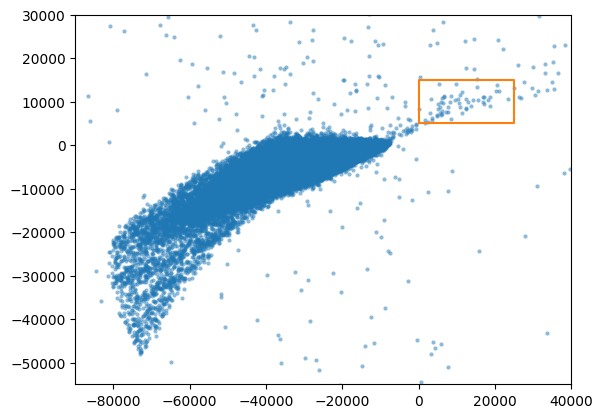

In [48]:
plt.plot(results['g_calibFlux']-results['r_calibFlux'],
         results['i_calibFlux']-results['z_calibFlux'],
         'o', ms=3, mew=0, alpha=0.5)
plt.plot([0.0,25000,25000,0,0],[5000,5000,15000,15000,5000])
plt.xlim([-90000,40000])
plt.ylim([-55000,30000])

In [50]:
s_gmr_low = '0'
s_gmr_hi  = '25000'
s_imz_low = '5000'
s_imz_hi  = '15000'

In [51]:
query = "SELECT objectId "\
        "FROM dp02_dc2_catalogs.Object "\
        "WHERE detect_isPrimary = 1 "\
        "AND refExtendedness = 0 "\
        "AND g_calibFlux > "+sf1+" "\
        "AND g_calibFlux < "+sf2+" "\
        "AND r_calibFlux > "+sf1+" "\
        "AND r_calibFlux < "+sf2+" "\
        "AND i_calibFlux > "+sf1+" "\
        "AND i_calibFlux < "+sf2+" "\
        "AND z_calibFlux > "+sf1+" "\
        "AND z_calibFlux < "+sf2+" "\
        "AND g_calibFlux - r_calibFlux > "+s_gmr_low+" "\
        "AND g_calibFlux - r_calibFlux < "+s_gmr_hi+" "\
        "AND i_calibFlux - z_calibFlux > "+s_imz_low+" "\
        "AND i_calibFlux - z_calibFlux < "+s_imz_hi+" "\

results = service.search(query)
results.to_table()

objectId
int64
1249537790362809267
1252528461990360512
1248772530269893180
1251728017525343554
1251710425339299404
1250030371572068167
1253443255664678173
1251807182362538413
1252607626827575504


In [57]:
my_tuple_string = str("(")
for i in range(len(results)):
    my_tuple_string += str(results['objectId'][i])
    if i < len(results)-1:
        my_tuple_string += ", "
    elif i == len(results)-1:
        my_tuple_string += ")"
print(my_tuple_string)

(1249537790362809267, 1252528461990360512, 1248772530269893180, 1251728017525343554, 1251710425339299404, 1250030371572068167, 1253443255664678173, 1251807182362538413, 1252607626827575504, 1249784080967440401, 1253065023664713612, 1325835101237446771, 1253575197060015134, 1249027616967521118, 1250769243385931188, 1327180903469839020, 1250742855106867126, 1327559135469795049, 1327233680027980005, 1330197963376469541, 1326134168400205152, 1329353538446318891, 1329511868120737770, 1327779037795355379, 1329907692306735740, 1403478214344443676, 1252801140874048474, 1326556380865280269, 1405184656390778649, 1403495806530516256, 1329599829050944409, 1407286922623092480, 1407348495274254048, 1329960468864854025, 1406583235181327629, 1408236900669485178, 1404472172855996316, 1405008734530341474, 1407533213227707836, 1408377638157848715, 1408456802995044263, 1407445252297488710, 1407629970250949562, 1484903647451063686, 1405052714995458882, 1407973017878826594, 1485739276288158831, 148663647777

In [58]:
query2 = "SELECT objectId, g_calibFlux, r_calibFlux, i_calibFlux, z_calibFlux "\
        "FROM dp02_dc2_catalogs.Object "\
        "WHERE objectId IN "+my_tuple_string

print(query2)

SELECT objectId, g_calibFlux, r_calibFlux, i_calibFlux, z_calibFlux FROM dp02_dc2_catalogs.Object WHERE objectId IN (1249537790362809267, 1252528461990360512, 1248772530269893180, 1251728017525343554, 1251710425339299404, 1250030371572068167, 1253443255664678173, 1251807182362538413, 1252607626827575504, 1249784080967440401, 1253065023664713612, 1325835101237446771, 1253575197060015134, 1249027616967521118, 1250769243385931188, 1327180903469839020, 1250742855106867126, 1327559135469795049, 1327233680027980005, 1330197963376469541, 1326134168400205152, 1329353538446318891, 1329511868120737770, 1327779037795355379, 1329907692306735740, 1403478214344443676, 1252801140874048474, 1326556380865280269, 1405184656390778649, 1403495806530516256, 1329599829050944409, 1407286922623092480, 1407348495274254048, 1329960468864854025, 1406583235181327629, 1408236900669485178, 1404472172855996316, 1405008734530341474, 1407533213227707836, 1408377638157848715, 1408456802995044263, 1407445252297488710, 1

In [59]:
results2 = service.search(query2)
results2.to_table()

objectId,g_calibFlux,r_calibFlux,i_calibFlux,z_calibFlux
,nJy,nJy,nJy,nJy
int64,float64,float64,float64,float64
1249537790362809267,74861.905009,71008.7684608,63042.0371438,55295.08567
1252528461990360512,110279.2848563,103913.6772331,92179.3105265,80406.3727666
1252607626827575504,96108.1210792,95609.7740778,88384.9612932,79696.7243888
1252801140874048474,94118.0766943,85865.5781955,74113.9735787,62961.2774641
1251710425339299404,129635.5052602,121466.0002045,106874.0670465,93195.9468387
1251728017525343554,111372.6558593,93813.3084746,77025.5928906,66590.9042056
1248772530269893180,72595.604498,61877.0381984,50825.0721705,42161.666567
1325835101237446771,114152.960789,103744.8805816,89196.0421991,76138.2338808


### that's a bit much for the doc, just pick the first 12

In [60]:
my_list = "(1249537790362809267, 1252528461990360512, 1248772530269893180, "\
          "1251728017525343554, 1251710425339299404, 1250030371572068167, "\
          "1253443255664678173, 1251807182362538413, 1252607626827575504, "\
          "1249784080967440401, 1253065023664713612, 1325835101237446771)"

query = "SELECT objectId, g_calibFlux, r_calibFlux, i_calibFlux, z_calibFlux "\
        "FROM dp02_dc2_catalogs.Object "\
        "WHERE objectId IN "+my_list

results = service.search(query)
results.to_table()

objectId,g_calibFlux,r_calibFlux,i_calibFlux,z_calibFlux
,nJy,nJy,nJy,nJy
int64,float64,float64,float64,float64
1249537790362809267,74861.905009,71008.7684608,63042.0371438,55295.08567
1252528461990360512,110279.2848563,103913.6772331,92179.3105265,80406.3727666
1252607626827575504,96108.1210792,95609.7740778,88384.9612932,79696.7243888
1248772530269893180,72595.604498,61877.0381984,50825.0721705,42161.666567
1250030371572068167,60933.2661254,53611.4883397,44881.5931521,37466.7524269
1251710425339299404,129635.5052602,121466.0002045,106874.0670465,93195.9468387
1251728017525343554,111372.6558593,93813.3084746,77025.5928906,66590.9042056
1325835101237446771,114152.960789,103744.8805816,89196.0421991,76138.2338808
